## Mapping Data with Pyleoclim

This notebook lays out the details of how we map data using [Pyleoclim](https://pyleoclim-util.readthedocs.io/en/latest/) objects that we loaded in the Load Data notebook. We also save some objects that will be used for plotting consistency later on.

The notebook is structured as follows:

1. Group records into regions, as is done in the original publication
2. Create a map of these objects using [Pyleoclim](https://pyleoclim-util.readthedocs.io/en/latest/index.html)
3. Save markers and colors for later use

In [1]:
# Importing relevant packages

import pickle

import pyleoclim as pyleo
import seaborn as sns

In [2]:
# This file should have been created earlier by the user via the load_data notebook

with open("../../data/geo_ms_composite_dict.pkl", "rb") as handle:
    geo_ms_composite_dict = pickle.load(handle)

Here we group our records into sub-regions, please see the original publication for info on how/why this was done if you're interested:

In [3]:
# construct colormap

group_dict = {
    "Mainland Asia": [
        "Kesang.China.2012",
        "Linzhu.China.2009",
        "Bittoo.India.2016",
        "Dongge.China.2004",
        "Sanbao.China.2016",
    ],
    "South America": ["CuevadelDiamante.Peru.2013", "Botuvera.Brazil.2005"],
    "North America": [
        "Leviathan.Nevada.2017",
        "DevilsHole.Nevada.2017",
        "BuckeyeCreek.WestVirginia.2019",
    ],
    "Eastern Mediterranean": [
        "Peqiin.Israel.2003",
        "JerusalemWest.Jerusalem.1999",
        "Soreq.Israel.2003",
    ],
    "Southeast Asian Archipelago": ["Clearwater.Borneo.2016"],
}

cmap_grouped = {}

for key, records in group_dict.items():
    if key == "Mainland Asia":
        cmap = sns.color_palette("Blues", len(records))
    elif key == "South America":
        cmap = sns.color_palette("Greens", len(records))
    elif key == "North America":
        cmap = sns.color_palette("Purples", len(records))
    elif key == "Eastern Mediterranean":
        cmap = sns.color_palette("Reds", len(records))
    # elif key == 'Southeast Asian Archipelago':
    #     cmap = sns.color_palette("Set1")
    for i, record in enumerate(records):
        if key == "Southeast Asian Archipelago":
            cmap_grouped[record] = sns.color_palette("tab10", 10)[5]
        else:
            cmap_grouped[record] = cmap[i]

Now we establish the plotting order to be used throughout the rest of the notebooks, and use a [MultipleGeoSeries](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multiplegeoseries-pyleoclim-multiplegeoseries) object to [map](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.multiplegeoseries.MultipleGeoSeries.map) the records:

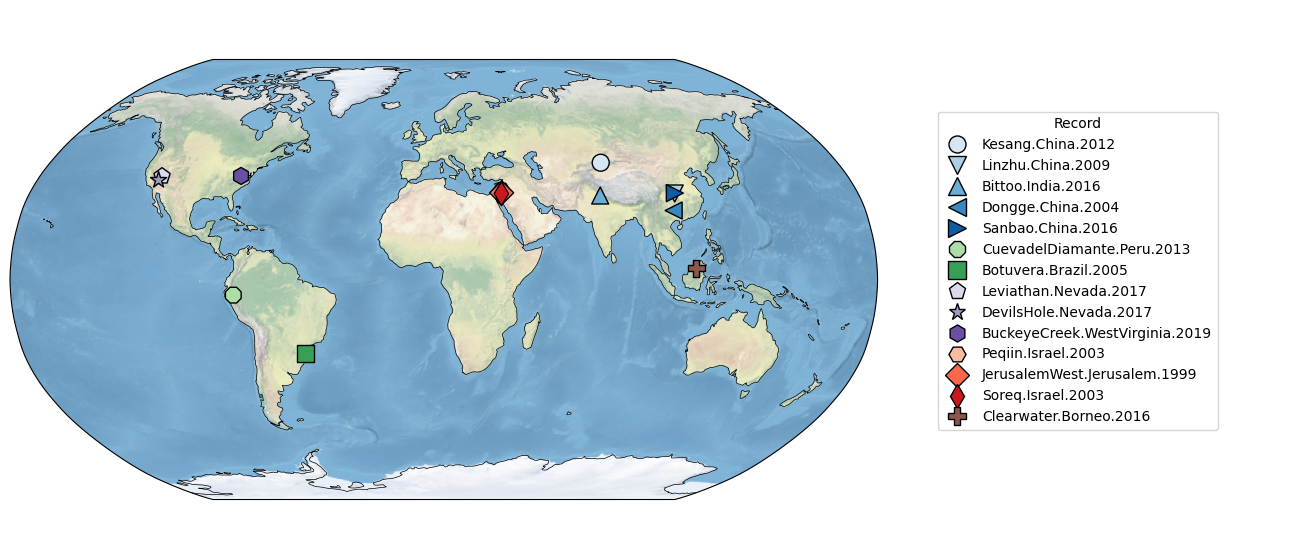

In [4]:
plot_order = [
    "Kesang.China.2012",
    "Linzhu.China.2009",
    "Bittoo.India.2016",
    "Dongge.China.2004",
    "Sanbao.China.2016",
    "CuevadelDiamante.Peru.2013",
    "Botuvera.Brazil.2005",
    "Leviathan.Nevada.2017",
    "DevilsHole.Nevada.2017",
    "BuckeyeCreek.WestVirginia.2019",
    "Peqiin.Israel.2003",
    "JerusalemWest.Jerusalem.1999",
    "Soreq.Israel.2003",
    "Clearwater.Borneo.2016",
]

geo_ms_composite_dict = {key: geo_ms_composite_dict[key] for key in plot_order}

geo_ms_composites = pyleo.MultipleGeoSeries(list(geo_ms_composite_dict.values()))

fig, ax = geo_ms_composites.map(
    projection="Robinson",
    proj_default={"central_longitude": 10},
    scatter_kwargs={
        "s": 150,
    },
    hue="label",
    hue_mapping=cmap_grouped,
    legend=True,
    marker="label",
)

legend_handles = ax["map"].get_legend_handles_labels()

cmap = {}
marker_dict = {}

for idx, handle in enumerate(legend_handles[0]):
    cmap[legend_handles[1][idx]] = handle._color
    marker_dict[legend_handles[1][idx]] = handle._marker

ax["map"].legend(loc="center right", bbox_to_anchor=(1.4, 0.52), title="Record")
ax["leg"].legend().remove()

In [5]:
with open("../../data/cmap_grouped.pkl", "wb") as handle:
    pickle.dump(cmap, handle)

with open("../../data/marker_dict.pkl", "wb") as handle:
    pickle.dump(marker_dict, handle)